# **Librerias**

In [7]:
# Importamos las Librerias 

import sklearn 
import matplotlib
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

# Versiones 

print(f'Numpy Version: {np.__version__}')
print(f'Pandas Version: {pd.__version__}')
print(f'Seaborn Version: {sns.__version__}')
print(f'Scikit-Learn Version: {sklearn.__version__}') 
print(f'Matplotlib Version: {matplotlib.__version__}')

Numpy Version: 2.3.1
Pandas Version: 2.3.1
Seaborn Version: 0.13.2
Scikit-Learn Version: 1.7.1
Matplotlib Version: 3.10.3


# **Matriz de Covarianza**

**Covarianza**: mide el **grado** de **dependencia lineal** entre dos **variables aleatorias** $X$ Y $Y$

$$\text{cov}[X, Y] = E\left[(X - E[X]) (Y - E[Y])\right] = E[XY] - E[X]E[Y]$$

* Si $\text{cov}[X, Y] > 0$ las variables tienden a **aumentar conjuntamente**

* Si $\text{cov}[X, Y] < 0$ una variable **aumenta** mientras la otra **disminuye**

* Si $\text{cov}[X, Y] = 0$ no hay **correlacion lineal**, aunque esto **no implica independencia**

**Matriz de Covarianza** de un **vector aleatorio** $x \in \mathbb{R}^D$

$$\text{cov}[x] = E\left[(x - E[x]) (x - E[x])^T\right]$$

$$\text{cov}[x] = \begin{pmatrix}
\text{var}[X_1] & \text{cov}[X_1, X_2] & \cdots & \text{cov}[X_1, X_d]\\
\text{cov}[X_1, X_2] & \text{var}[X_2] & \cdots & \text{cov}[X_2, X_d]\\
\vdots & \vdots & \ddots & \vdots\\
\text{cov}[X_d, X_1] & \text{cov}[X_d, X_2] & \cdots & \text{var}[X_d]
\end{pmatrix}$$

**Matrices Simetricas**

Estas matrices poseen propiedades algebraicas fundamentales:

* **Simetrica**: $\text{A}^T = \text{A}$

* **Definida Positiva**: $z^T A z > 0$ adicionalmente autovalores reales (simetria) y positivos (definida positiva) $\lambda_i > 0$

* **Semidefinida Positiva**: $z^T A z \geq 0$ adicionalmente autovalores reales (simetria) y positivos (semidefinida positiva) $\lambda_i \geq 0$

* **Inversa**: es definida positiva $S_{++}^D$ si A es definida positiva $S_{++}^D$

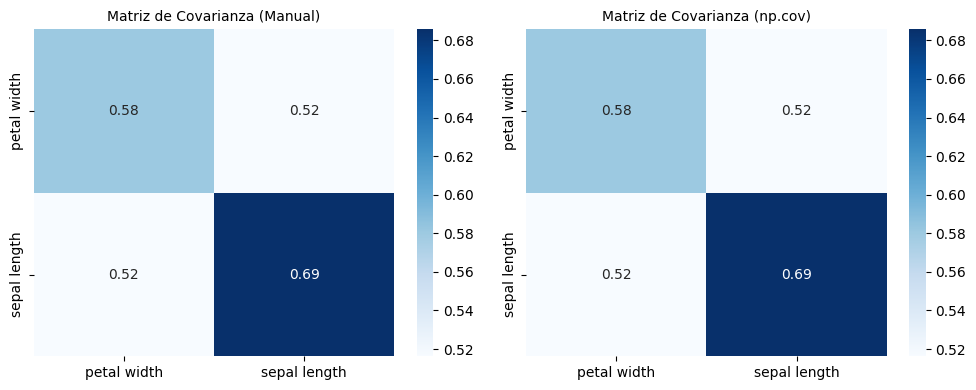

In [2]:
# Definimos el Dataset Iris

iris_dataset = load_iris()

x_features = iris_dataset.data 
y_targets = iris_dataset.target 

feature_names = iris_dataset.feature_names
target_names = iris_dataset.target_names

# Seleccionamos dos Features (Cada Feature tiene 150 Muestras)

petal_width_idx = iris_dataset.feature_names.index('petal width (cm)')
sepal_length_idx = iris_dataset.feature_names.index('sepal length (cm)')

petal_width = x_features[:, petal_width_idx]
sepal_length = x_features[:, sepal_length_idx]

# Definimos el vector aleatorio (150, 2)

random_vec = np.stack([petal_width, sepal_length], axis = 1)

# Calculamos el valor esperado del vector aleatorio (1, 2)

mean_random_vec = np.mean(random_vec, axis = 0, keepdims = True) 

# Sustraemos el valor esperado del vector aleatorio (150, 2)

vec = random_vec - mean_random_vec

# Calculamos la Matriz de Covarianza aplicando producto externo (150, 2) * (150, 2) (Como trabajamos sobre las muestras tenemos que dividir entre n - 1)

cov_manual = (vec.T @ vec) / (vec.shape[0] - 1) 

# Calculamos la Matriz de Covarianza Automaticamente 

cov_auto = np.cov(random_vec.T)

# Visualizamos

fig, axes = plt.subplots(1, 2, figsize = (10, 4))

labels = ['petal width', 'sepal length']

df_cov_manual = pd.DataFrame(cov_manual, index = labels, columns = labels)
df_cov_auto = pd.DataFrame(cov_auto, index = labels, columns = labels)

sns.heatmap(df_cov_manual, annot = True, fmt = ".2f", cmap = "Blues", ax = axes[0], cbar = True)
axes[0].set_title("Matriz de Covarianza (Manual)", fontsize = 10)

sns.heatmap(df_cov_auto, annot = True, fmt = ".2f", cmap = "Blues", ax = axes[1], cbar = True)
axes[1].set_title("Matriz de Covarianza (np.cov)", fontsize = 10)

plt.tight_layout()
plt.show()

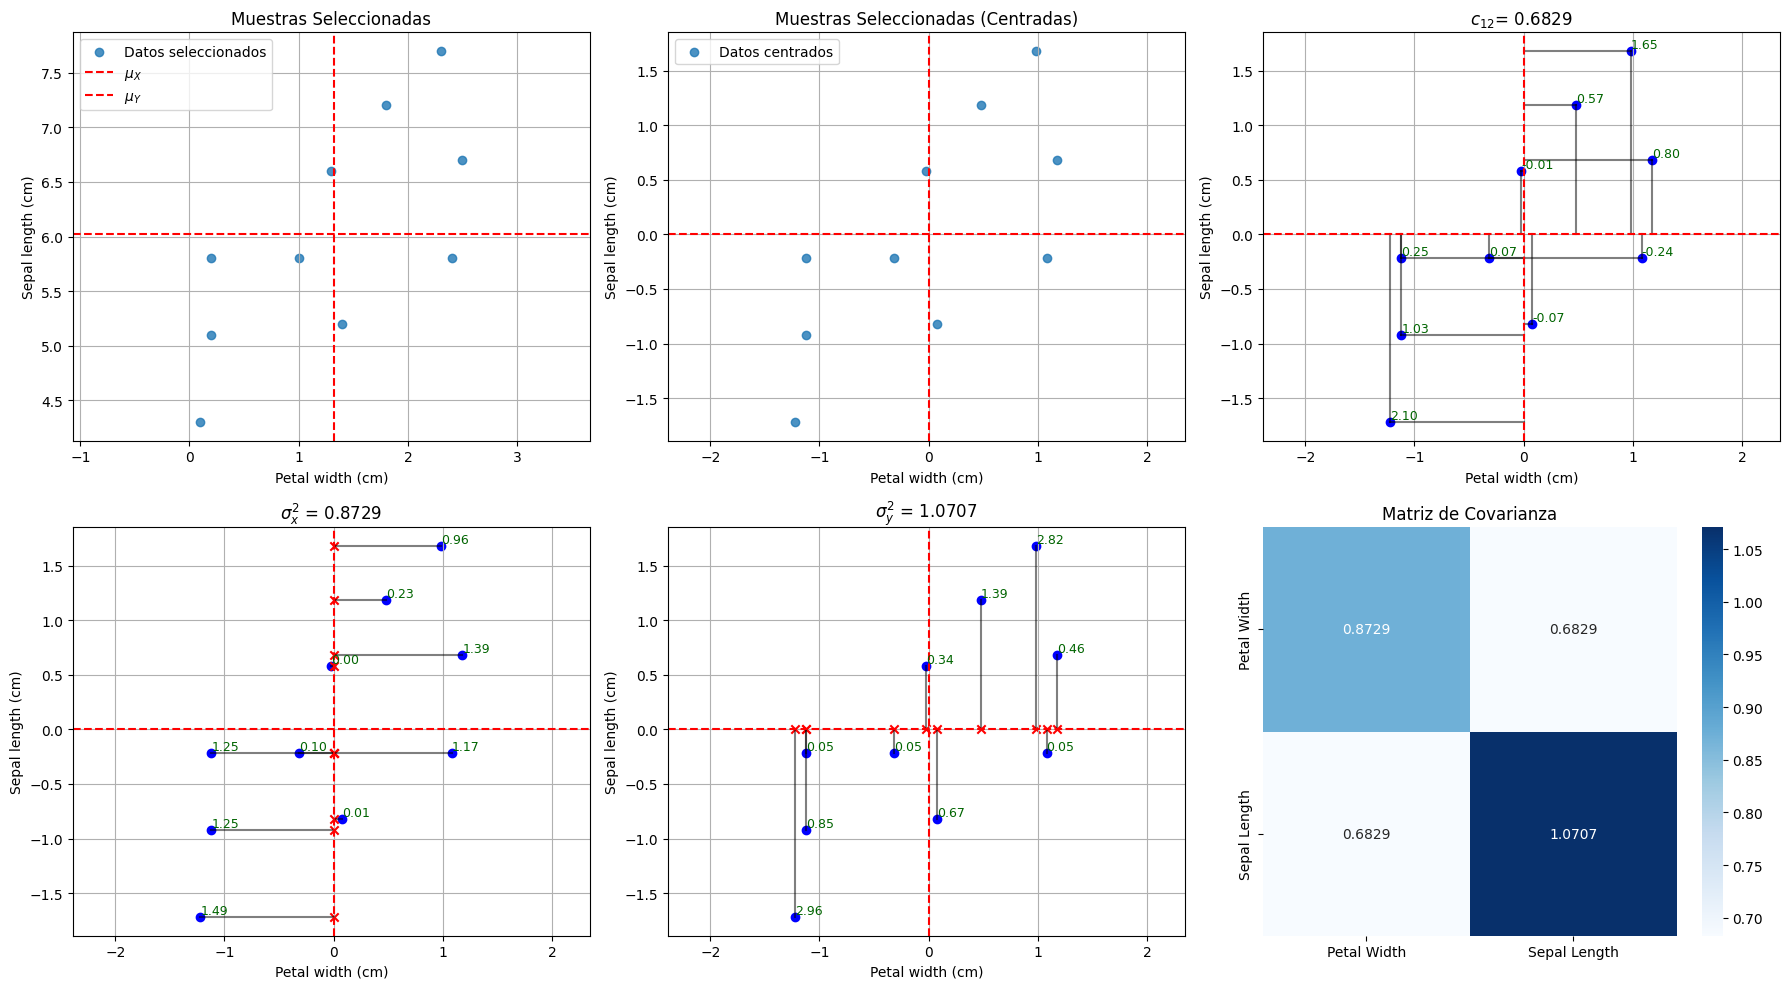

In [10]:
# Definimos el Dataset Iris

iris_dataset = load_iris()

x_features = iris_dataset.data 
y_targets = iris_dataset.target 

feature_names = iris_dataset.feature_names
target_names = iris_dataset.target_names

# Seleccionamos dos Features (Cada Feature tiene 150 Muestras)

petal_width_idx = iris_dataset.feature_names.index('petal width (cm)')
sepal_length_idx = iris_dataset.feature_names.index('sepal length (cm)')

petal_width = x_features[:, petal_width_idx]
sepal_length = x_features[:, sepal_length_idx]

# Definimos el vector aleatorio (150, 2)

random_vec = np.stack([petal_width, sepal_length], axis = 1)

# Definimos una Funcion para Tomar 10 muestras que esten lo mas separadas posibles (Para que la visualizacion sea entienda)

def select_farthest_points(data, n_points = 10):

    selected_indices = [0]

    while len(selected_indices) < n_points:
        dist_to_selected = []

        remaining_indices = list(set(range(data.shape[0])) - set(selected_indices))

        for idx in remaining_indices:
            dists = np.linalg.norm(data[idx] - data[selected_indices], axis = 1)
            dist_to_selected.append(np.min(dists))

        next_idx = remaining_indices[np.argmax(dist_to_selected)]
        selected_indices.append(next_idx)

    return selected_indices

# Seleccionamos las Muestras

selected_idx = select_farthest_points(random_vec, n_points=10)
random_vec_selected = random_vec[selected_idx]

# Calculamos el valor esperado del vector aleatorio (1, 2)

mean_random_vec = np.mean(random_vec_selected, axis=0, keepdims=True)

# Sustraemos el valor esperado del vector aleatorio (150, 2)

vec_centered = random_vec_selected - mean_random_vec

# Calculamos los Valores de la Matriz de Covarianza Manualmente 

sum_cross = np.sum(vec_centered[:, 0] * vec_centered[:, 1]) / (vec_centered.shape[0] - 1)
sum_x_sq = np.sum(vec_centered[:, 0]**2) / (vec_centered.shape[0] - 1)
sum_y_sq = np.sum(vec_centered[:, 1]**2) / (vec_centered.shape[0] - 1)

# Calculamos la Matriz de Covarianza para comparacion 

labels = ['Petal Width', 'Sepal Length']

cov_matrix = np.cov(random_vec_selected.T)

df_cov = pd.DataFrame(cov_matrix, index = labels, columns = labels)

# Visualizamos

fig, axes = plt.subplots(2, 3, figsize = (18, 10))

axes[0, 0].scatter(random_vec_selected[:, 0], random_vec_selected[:, 1], alpha = 0.8, label = 'Datos seleccionados')
axes[0, 0].axvline(mean_random_vec[0, 0], color = 'red', linestyle = '--', label = r'$\mu_X$')
axes[0, 0].axhline(mean_random_vec[0, 1], color = 'red', linestyle = '--', label = r'$\mu_Y$')
axes[0, 0].set_title('Muestras Seleccionadas')
axes[0, 0].set_xlabel('Petal width (cm)')
axes[0, 0].set_ylabel('Sepal length (cm)')
axes[0, 0].legend()
axes[0, 0].grid(True)
axes[0, 0].axis('equal')

axes[0, 1].scatter(vec_centered[:, 0], vec_centered[:, 1], alpha = 0.8, label = 'Datos centrados')
axes[0, 1].axhline(0, color = 'red', linestyle = '--')
axes[0, 1].axvline(0, color = 'red', linestyle = '--')
axes[0, 1].set_title('Muestras Seleccionadas (Centradas)')
axes[0, 1].set_xlabel('Petal width (cm)')
axes[0, 1].set_ylabel('Sepal length (cm)')
axes[0, 1].legend()
axes[0, 1].grid(True)
axes[0, 1].axis('equal')

for i, (x_i, y_i) in enumerate(vec_centered):

    axes[0, 2].plot([0, x_i], [y_i, y_i], color = 'black', alpha = 0.5)
    axes[0, 2].plot([x_i, x_i], [0, y_i], color = 'black', alpha = 0.5)
    axes[0, 2].scatter(x_i, y_i, color = 'blue')
    axes[0, 2].text(x_i, y_i, f"{x_i * y_i:.2f}", fontsize = 9, color = 'darkgreen', verticalalignment = 'bottom', horizontalalignment = 'left')
    
axes[0, 2].set_title(r'$c_{12}$' f'= {sum_cross:.4f}')
axes[0, 2].set_xlabel('Petal width (cm)')
axes[0, 2].set_ylabel('Sepal length (cm)')
axes[0, 2].axhline(0, color = 'red', linestyle = '--')
axes[0, 2].axvline(0, color = 'red', linestyle = '--')
axes[0, 2].grid(True)
axes[0, 2].axis('equal')

for i, (x_i, y_i) in enumerate(vec_centered):

    axes[1, 0].plot([0, x_i], [y_i, y_i], color = 'black', alpha = 0.5)
    axes[1, 0].scatter(x_i, y_i, color = 'blue')
    axes[1, 0].scatter(0, y_i, color = 'red', marker = 'x')
    axes[1, 0].text(x_i, y_i, f"{x_i**2:.2f}", fontsize = 9, color = 'darkgreen', verticalalignment = 'bottom', horizontalalignment = 'left')

axes[1, 0].axhline(0, color = 'red', linestyle = '--')
axes[1, 0].axvline(0, color = 'red', linestyle = '--')
axes[1, 0].set_title(rf'$\sigma_x^2$ = {sum_x_sq:.4f}')
axes[1, 0].set_xlabel('Petal width (cm)')
axes[1, 0].set_ylabel('Sepal length (cm)')
axes[1, 0].grid(True)
axes[1, 0].axis('equal')

for i, (x_i, y_i) in enumerate(vec_centered):
    axes[1, 1].plot([x_i, x_i], [0, y_i], color = 'black', alpha = 0.5)
    axes[1, 1].scatter(x_i, y_i, color = 'blue')
    axes[1, 1].scatter(x_i, 0, color = 'red', marker = 'x')
    axes[1, 1].text(x_i, y_i, f"{y_i**2:.2f}", fontsize = 9, color = 'darkgreen', verticalalignment = 'bottom', horizontalalignment = 'left')

axes[1, 1].axhline(0, color = 'red', linestyle = '--')
axes[1, 1].axvline(0, color = 'red', linestyle = '--')
axes[1, 1].set_title(rf'$\sigma_y^2$ = {sum_y_sq:.4f}')
axes[1, 1].set_xlabel('Petal width (cm)')
axes[1, 1].set_ylabel('Sepal length (cm)')
axes[1, 1].grid(True)
axes[1, 1].axis('equal')

sns.heatmap(df_cov, annot = True, fmt = ".4f", cmap = "Blues", cbar = True, ax = axes[1, 2])
axes[1, 2].set_title('Matriz de Covarianza')

plt.tight_layout()
plt.show()

# **Eigenvectores y Eigenvalores**

Los **eigenvectores** de la **matriz de covarianza** indican las **direcciones principales** de maxima variacion de los datos. Los **eigenvalores** correspondientes cuantifican la **varianza** en esas direcciones

$$\text{cov}[x] = \Sigma$$
$$\Sigma \hspace{0.05cm} x = \lambda \hspace{0.05cm} x$$

La **traza** de la **matriz de covarianza** es equivalente a la suma de los **eigenvalores**, lo cual representa la **varianza total** de los datos

$$\text{Var}(x) = \text{Tr} (\Sigma) = \lambda_1 + \lambda_2 + \dots + \lambda_n$$

La **matriz de covarianza** puede descomponerse como

$$\Sigma = \text{U} \Lambda \text{U}^T$$

En donde 

* $\text{U}$: es la matriz de eigenvectores 

* $\Lambda$: es la matriz de eigenvalores 

**Nota:** Esta factorizacion permite **reconstruir** la matriz de covarianza original a partir de la varianza en las direcciones principales

### **Reconstruccion de la Matriz de Covarianza**

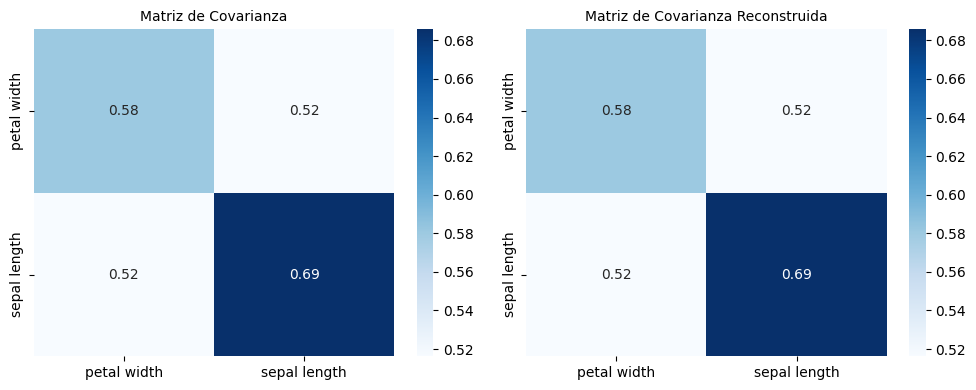

In [4]:
# Definimos el Dataset Iris

iris_dataset = load_iris()

x_features = iris_dataset.data 
y_targets = iris_dataset.target 

feature_names = iris_dataset.feature_names
target_names = iris_dataset.target_names

# Seleccionamos dos Features (Cada Feature tiene 150 Muestras)

petal_width_idx = iris_dataset.feature_names.index('petal width (cm)')
sepal_length_idx = iris_dataset.feature_names.index('sepal length (cm)')

petal_width = x_features[:, petal_width_idx]
sepal_length = x_features[:, sepal_length_idx]

# Definimos el vector aleatorio (150, 2)

random_vec = np.stack([petal_width, sepal_length], axis = 1)

# Calculamos el valor esperado del vector aleatorio (1, 2)

mean_random_vec = np.mean(random_vec, axis = 0, keepdims = True) 

# Sustraemos el valor esperado del vector aleatorio (150, 2)

vec = random_vec - mean_random_vec

# Calculamos la Matriz de Covarianza 

cov = np.cov(random_vec.T)

# Calculamos los eigenvectores y los eigenvalores 

eigenvals, eigenvecs = np.linalg.eigh(cov) 

# Reconstruimos la Matriz de Covarianza  

cov_build = eigenvecs @ np.diag(eigenvals) @  eigenvecs.T

# Visualizamos

fig, axes = plt.subplots(1, 2, figsize = (10, 4))

labels = ['petal width', 'sepal length']

df_cov = pd.DataFrame(cov, index = labels, columns = labels)
df_cov_build = pd.DataFrame(cov_build, index = labels, columns = labels)

sns.heatmap(df_cov, annot = True, fmt = ".2f", cmap = "Blues", ax = axes[0], cbar = True)
axes[0].set_title("Matriz de Covarianza", fontsize = 10)

sns.heatmap(df_cov_build, annot = True, fmt = ".2f", cmap = "Blues", ax = axes[1], cbar = True)
axes[1].set_title("Matriz de Covarianza Reconstruida", fontsize = 10)

plt.tight_layout()
plt.show()

### **Muestras Completas**

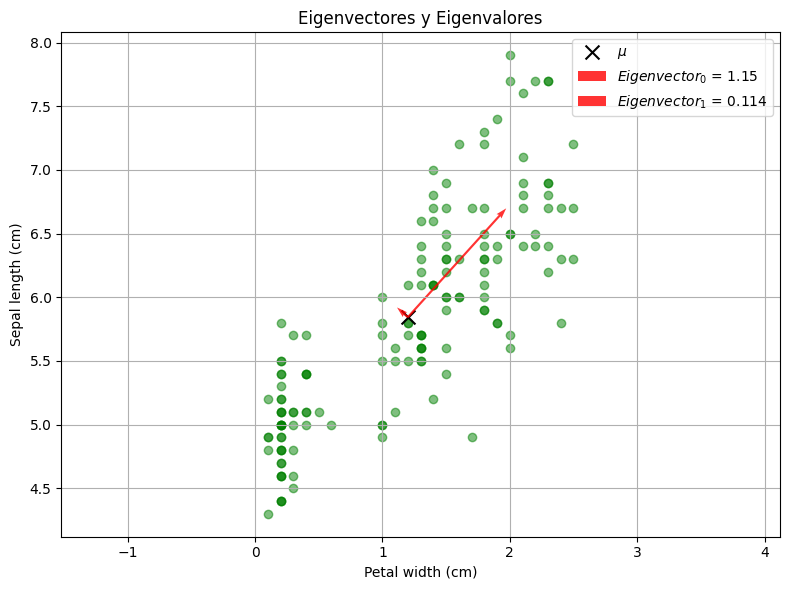

In [5]:
# Definimos el Dataset Iris

iris_dataset = load_iris()

x_features = iris_dataset.data 
y_targets = iris_dataset.target 

feature_names = iris_dataset.feature_names
target_names = iris_dataset.target_names

# Seleccionamos dos Features (Cada Feature tiene 150 Muestras)

petal_width_idx = iris_dataset.feature_names.index('petal width (cm)')
sepal_length_idx = iris_dataset.feature_names.index('sepal length (cm)')

petal_width = x_features[:, petal_width_idx]
sepal_length = x_features[:, sepal_length_idx]

# Definimos el vector aleatorio (150, 2)

random_vec = np.stack([petal_width, sepal_length], axis = 1)

# Calculamos la Matriz de Covarianza y sus Eigenvectores y Eigenvalores (.eigh --> especial para matrices simetricas)

mean_random_vec = np.mean(random_vec, axis = 0, keepdims = True) 

cov = np.cov(random_vec.T) 
eigenvals, eigenvecs = np.linalg.eigh(cov) 

# Ordenamos los Eigenvalores de mayor a menor (Cada eigenvalor representa la varianza de los datos en esa direcciony cada eigenvector nos indica la direccion)

eigenvals_order = np.argsort(eigenvals)[::-1] 

eigenvals = eigenvals[eigenvals_order]
eigenvecs = eigenvecs[:, eigenvals_order] 

# Visualizamos 

plt.figure(figsize = (8, 6))

plt.scatter(random_vec[:, 0], random_vec[:, 1], alpha = 0.5, color = 'green')
plt.scatter(mean_random_vec[0, 0], mean_random_vec[0, 1], color = 'black', marker = 'x', s = 100, label = r'$\mu$')

for idx in range(0, len(eigenvals)):
    eigenvec = eigenvecs[:, idx]
    var = eigenvals[idx]

    plt.quiver(mean_random_vec[0, 0], mean_random_vec[0, 1], eigenvec[0] * var, eigenvec[1] * var, angles = 'xy', scale_units = 'xy', scale = 1, color = 'red', alpha = 0.8, width = 0.003, 
               label = rf'$Eigenvector_{idx}$ = {var:0.3}')

plt.xlabel('Petal width (cm)')
plt.ylabel('Sepal length (cm)')
plt.title('Eigenvectores y Eigenvalores')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

### **Muestras por Clases**

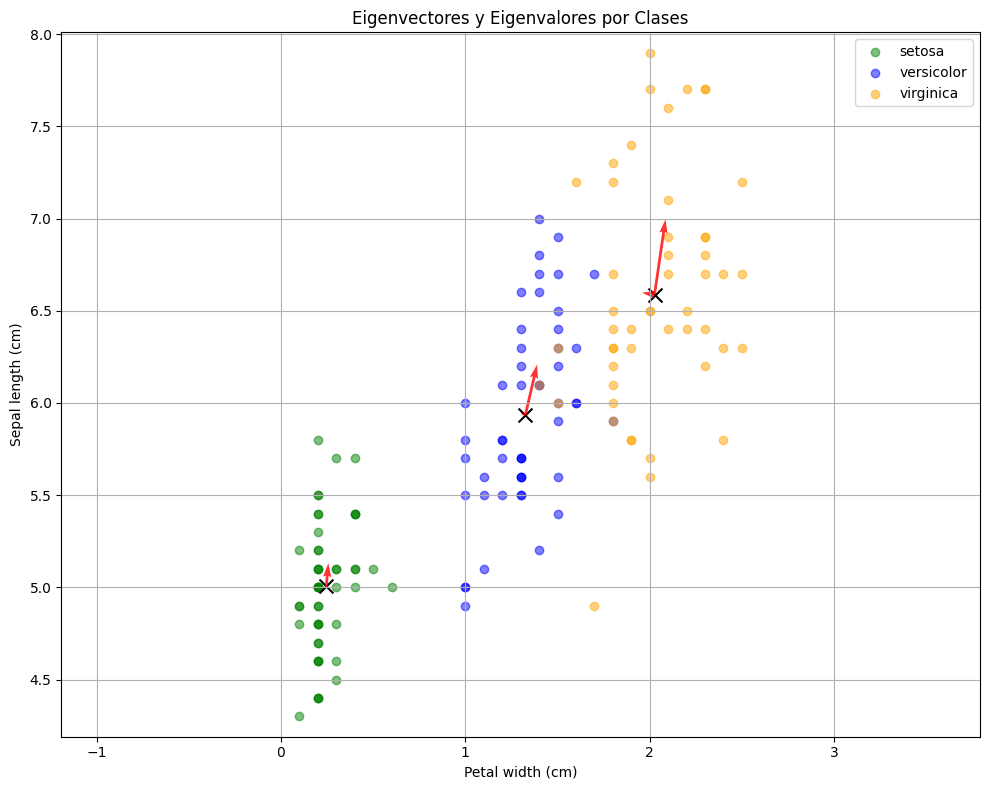

In [6]:
# Definimos el Dataset Iris

iris_dataset = load_iris()

x_features = iris_dataset.data 
y_targets = iris_dataset.target 

feature_names = iris_dataset.feature_names
target_names = iris_dataset.target_names

# Seleccionamos dos Features (Cada Feature tiene 150 Muestras)

petal_width_idx = iris_dataset.feature_names.index('petal width (cm)')
sepal_length_idx = iris_dataset.feature_names.index('sepal length (cm)')

petal_width = x_features[:, petal_width_idx]
sepal_length = x_features[:, sepal_length_idx]

# Definimos el vector aleatorio (150, 2)

random_vec = np.stack([petal_width, sepal_length], axis = 1)

# Calculamos la Matriz de Covarianza y sus Eigenvectores y Eigenvalores (.eigh --> especial para matrices simetricas)

features_dict = {}
targets_dict = {}
means_dict = {}
eigenvecs_dict = {}
eigenvals_dict = {} 

for classe in range(0, len(target_names)):
    
    mask = (classe == y_targets) 
    random_vec_classe = random_vec[mask] 
    target_classe = y_targets[mask]

    mean_random_vec_classe = np.mean(random_vec_classe, axis = 0, keepdims = True) 

    cov = np.cov(random_vec_classe.T) 
    eigenvals, eigenvecs = np.linalg.eigh(cov) 

    eigenvals_order = np.argsort(eigenvals)[::-1] 

    eigenvals = eigenvals[eigenvals_order]
    eigenvecs = eigenvecs[:, eigenvals_order] 
    
    features_dict[classe] = random_vec_classe
    targets_dict[classe] = target_classe
    means_dict[classe] = mean_random_vec_classe
    eigenvecs_dict[classe] = eigenvecs
    eigenvals_dict[classe] = eigenvals

# Visualizamos 

colors = ['green', 'blue', 'orange']

plt.figure(figsize = (10, 8))

for classe in range(0 , len(features_dict)):

    features = features_dict[classe]
    mean = means_dict[classe][0]
    eigenvecs = eigenvecs_dict[classe]
    eigenvals = eigenvals_dict[classe]

    plt.scatter(features[:, 0], features[:, 1], alpha = 0.5, color = colors[classe], label = f'{target_names[classe]}')
    plt.scatter(mean[0], mean[1], color = 'black', marker = 'x', s = 100)

    for idx in range(0, len(eigenvals)):
        eigenvec = eigenvecs[:, idx]
        var = eigenvals[idx]

        plt.quiver(mean[0], mean[1], eigenvec[0] * var, eigenvec[1] * var, angles = 'xy', scale_units = 'xy', scale = 1, color = 'red', alpha = 0.8, width = 0.003)

plt.xlabel('Petal width (cm)')
plt.ylabel('Sepal length (cm)')
plt.title('Eigenvectores y Eigenvalores por Clases')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()